# Ciencia de Datos 2022

### Alan Reyes-Figueroa

In [1]:
import time

import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Spectral Clustering

In [2]:
rescale_params = {'anti_aliasing': False, 'multichannel': False}

In [3]:
# load the coins as a numpy array
orig_coins = coins()

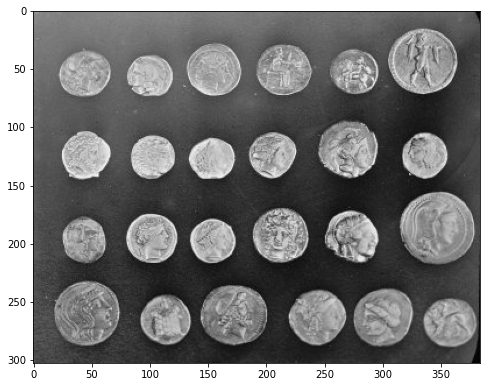

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(orig_coins, cmap='gray')
plt.show()

In [5]:
# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                         **rescale_params)

In [6]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(rescaled_coins)

In [7]:
# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

In [8]:
graph.shape

(4697, 4697)

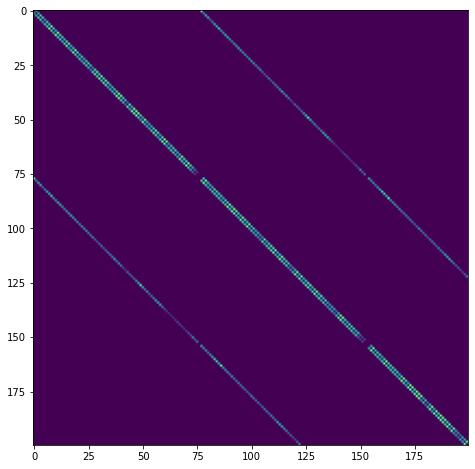

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(1 + graph.todense()[:200,:200])
plt.show()

In [11]:
# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 25

Spectral clustering: kmeans, 1.78s
Spectral clustering: discretize, 1.72s


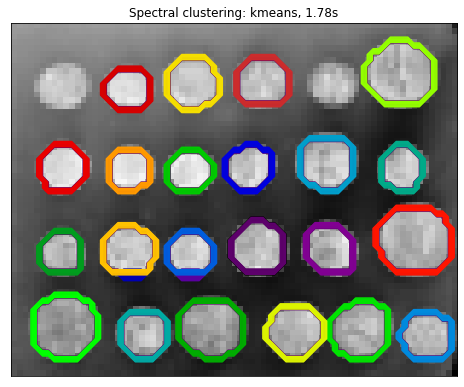

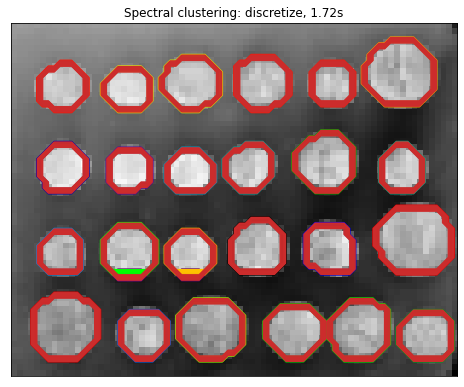

In [12]:
#Visualize the resulting regions

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=42)
    t1 = time.time()
    labels = labels.reshape(rescaled_coins.shape)

    plt.figure(figsize=(8,8))
    plt.imshow(rescaled_coins, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()